In [1]:
import numpy as np
import cv2
import glob
import time
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from scipy.ndimage.measurements import label
import vehicle_detection as vd

In [2]:
cars = glob.glob('/Users/ntaheria/CarND-Vehicle-Detection/vehicles/*/*.png')
notcars = glob.glob('/Users/ntaheria/CarND-Vehicle-Detection/non-vehicles/*/*.png')

In [3]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
hist_range=(0, 256)
y_start_stop = [400, 720] # Min and max in y to search in slide_window()

/Users/ntaheria/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


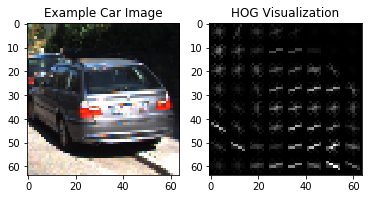

In [5]:
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Plot HOG visualisation
features, hog_image = vd.get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

In [6]:
car_features = vd.extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = vd.extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

/Users/ntaheria/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [7]:
print('Using:', orient, 'orientations', pix_per_cell,
          'pixels per cell and', cell_per_block, 'cells per block')
svc, X_scaler = vd.train_test_svm(car_features, notcar_features)

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
30.47 Seconds to train SVC...
Test Accuracy of SVC =  0.9848


In [8]:
import pickle 
pickle.dump(svc, open( "svc.p", "wb" ) )
pickle.dump(X_scaler, open( "X_scaler.p", "wb" ) )

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.measurements import label
%matplotlib inline
import glob

In [10]:
img = mpimg.imread('./test_images/test6.jpg')

/Users/ntaheria/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


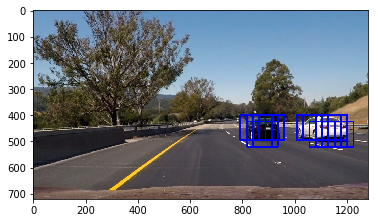

In [11]:
draw_img, bbox_list = vd.find_cars(img, svc=svc, X_scaler=X_scaler, orient=orient,
                                   pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                   spatial_size=spatial_size, hist_bins=hist_bins, scale=1.5)
plt.imshow(draw_img)

In [12]:
images = glob.glob('./test_images/*.jpg')
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    draw_img, bbox_list = vd.find_cars(img, svc=svc, X_scaler=X_scaler, orient=orient,
                                   pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                   spatial_size=spatial_size, hist_bins=hist_bins, scale=1.5)
    mpimg.imsave('./output_images/out_'+str(i)+'.jpg', draw_img)

/Users/ntaheria/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [13]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)

In [14]:
heat = vd.add_heat(heat,bbox_list)

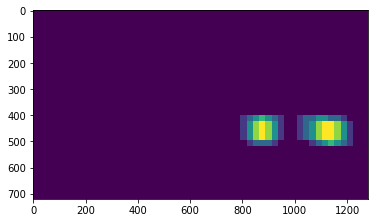

In [15]:
plt.imshow(heat)

In [16]:
heat = vd.apply_threshold(heat,1)

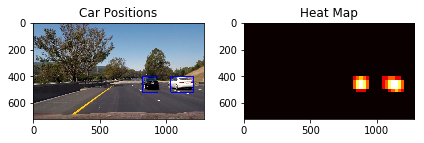

In [17]:
heatmap = np.clip(heat, 0, 255)
labels = label(heatmap)
draw_img = vd.draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

In [18]:
import continous_vehicle_detection as cvd
import imageio
imageio.plugins.ffmpeg.download()
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
imageio.plugins.ffmpeg.download()

In [19]:
cvd.process_video('./project_video.mp4', file_out='project_out.mp4')

[MoviePy] >>>> Building video project_out.mp4
[MoviePy] Writing video project_out.mp4


100%|█████████▉| 1260/1261 [11:31<00:00,  1.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_out.mp4 

